En primer lugar vamos a importar tensorflow y vamos a comprobar su versión

In [7]:
import tensorflow as tf
print(tf.__version__)

2.3.0


Ahora, vamos a importar keras y a ver su versión

In [8]:
from tensorflow import keras
print(keras.__version__)

2.4.0


**Construcción de una clasificador de imagenes utilizando una API secuencial**

vamos a cargar ahora uno de los dataset de entrenamiento de keras, el reconocimiento de los digitos

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Vamos a ver el tamaño del dataset, y el tamaño de la imagen

In [10]:
X_train_full.shape

(60000, 28, 28)

Aqui comprobamos el tipo de dato 

In [11]:
X_train_full.dtype

dtype('uint8')

Un poco de pretratamiento de los datos, en este caso como vamos a usar el gradient descent, necesitamos reescalar los datos a 0-1

In [12]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Le damos un nombre a cada una de las clases

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

**Creación del modelo usando una API secuencial**

In [17]:
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

otra forma de hacer esta misma operación de añadir capas:


In [ ]:
# model= keras.models.Sequential([]
#    keras.layers.Flatten(input_shape=[28,28])
#    keras.layers.Dense(300, activation="relu")
#    keras.layers.Dense(300, activation="relu")
#    keras.layers.Dense(10, activation="softmax")
#])

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


Vamos ahora a ver las capas

In [19]:
model.layers

algunas operaciones y comando interesantes

In [21]:
hidden1=model.layers[1]
hidden1.name

'dense_3'

In [23]:
model.get_layer('dense_3') is hidden1

True

Todos los parametros de una capa estan accesibles utilizando "get_weights()" y "set_weights()"

In [24]:
weights, biases = hidden1.get_weights()
weights

array([[-0.03756979, -0.02257548, -0.00419761, ...,  0.00521695,
        -0.07006545, -0.04423968],
       [-0.03471199, -0.03795394,  0.02258426, ...,  0.06851658,
        -0.04609309,  0.02874979],
       [ 0.02491674, -0.06581084,  0.02695432, ..., -0.01986175,
        -0.049628  , -0.03825761],
       ...,
       [ 0.07227436, -0.02901563, -0.04053048, ..., -0.06788791,
         0.02353751, -0.00467421],
       [-0.01916036, -0.00807315,  0.00436845, ...,  0.0223963 ,
        -0.04792164,  0.06238057],
       [ 0.01921144, -0.03714614, -0.03165459, ...,  0.03344768,
         0.06786257,  0.01914599]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

**Compilando el modelo**

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

**Entrenando y evaluando el modelo**

In [30]:
history = model.fit(X_train,y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7167 - accuracy: 0.7652 - val_loss: 0.4978 - val_accuracy: 0.8320
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4868 - accuracy: 0.8309 - val_loss: 0.4534 - val_accuracy: 0.8430
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4435 - accuracy: 0.8446 - val_loss: 0.4124 - val_accuracy: 0.8646
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4146 - accuracy: 0.8535 - val_loss: 0.4097 - val_accuracy: 0.8522
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3949 - accuracy: 0.8610 - val_loss: 0.4087 - val_accuracy: 0.8604
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3801 - accuracy: 0.8672 - val_loss: 0.3700 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3674 - accuracy: 0.8714 - val_loss: 0.3628 - val_accuracy:

Ahora vamos a comprobar las variables loss, accuracy, validation_loss y validation_accuracy

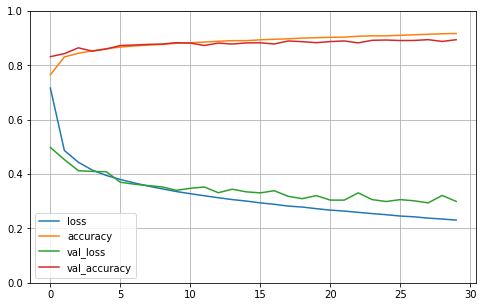

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Fijaros que las curvas training accuracy y validation accuracy  se van incrementando durante el entrenamiento, mientras que las loss se hacen mas pequeñas

In [33]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 62.9938 - accuracy: 0.8527


[62.993812561035156, 0.8526999950408936]